In [378]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
sns.set_style('whitegrid')


In [3]:
file = ".//Data//Small_Data//offline_sales.json"

In [4]:
## Create DF with offline data
df = pd.read_json(file, lines=True, dtype={'customer_id': str})
## Read customer_id as string to deal with big numbers

# 1.0 - Exploratory Data Analysis | Análise Exploratória de Dados

In [5]:
## Checking DF
df.head(10)

,date,state,store_id,sale_id,off_product_id,quantity,price,customer_id
0,2018-08-01,RN,3162633,323932636465316,643839313230323,1,279.0,None
1,2018-08-01,RN,3162633,326463633336323,613665646663346,1,229.0,None
2,2018-08-01,RN,3162633,333331346330323,343739666265353,1,179.0,None
3,2018-08-01,RN,3162633,393461383633336,373034633762613,1,269.0,None
4,2018-08-01,RN,3162633,616531626536373,343634373062363,1,29.0,None
5,2018-08-01,RN,3162633,626462353638383,616339353035393,1,459.0,None
6,2018-08-01,RN,3162633,653363623539323,346165376638356,1,369.0,None
7,2018-08-01,RN,3162633,666639323036376,643839313363376,1,149.0,30373934343338363136
8,2018-08-01,RN,3162633,636238633865636,333835396465353,1,198.0,30393833353363303832
9,2018-08-01,RN,3162633,626239383061353,343332613639373,1,229.0,31366262653431626130


In [6]:
## Replace None to NaN
df.customer_id.replace('None', np.nan, inplace=True)

In [7]:
## Total Entries
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29372 entries, 0 to 29371
Data columns (total 8 columns):
date              29372 non-null datetime64[ns]
state             29372 non-null object
store_id          29372 non-null int64
sale_id           29372 non-null int64
off_product_id    29372 non-null int64
quantity          29372 non-null int64
price             29372 non-null float64
customer_id       25844 non-null object
dtypes: datetime64[ns](1), float64(1), int64(4), object(2)
memory usage: 1.8+ MB


**29372 rows, 8 columns**

In [8]:
## Check dtypes
df.dtypes

date              datetime64[ns]
state                     object
store_id                   int64
sale_id                    int64
off_product_id             int64
quantity                   int64
price                    float64
customer_id               object
dtype: object

In [9]:
print('Dia Inicial:',df.date.min())
print('Dia Final:',df.date.max())

Dia Inicial: 2018-08-01 00:00:00
Dia Final: 2018-08-31 00:00:00


**Período de Coleta = Agosto 2018**

In [10]:
## Checando Correspondencias de Estados
df.state.value_counts()

RJ    8867
SP    6123
RS    4631
PE    3289
AM    1527
RN    1472
MA    1078
PR     888
PI     834
MS     361
GO     302
Name: state, dtype: int64

**Estado mais frequente (provavel estado que consome mais) = RJ**

# 2.0 - Preparation | Preparação

## 2.1 Data Cleaning - NaN | Limpeza de Dados - NaN

In [11]:
## Checking for NaN values
df.isnull().sum()

date                 0
state                0
store_id             0
sale_id              0
off_product_id       0
quantity             0
price                0
customer_id       3528
dtype: int64

**3528 NaN values on customer_id column**  
**Clean or manipulate this**  
**12% of costumer_id is Empty**

In [12]:
## Create DF with no null values (not best aproach but the missing Data is ID's, what do with this?)
no_null = df.copy()
no_null.dropna(axis=0, inplace=True)
no_null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25844 entries, 7 to 29371
Data columns (total 8 columns):
date              25844 non-null datetime64[ns]
state             25844 non-null object
store_id          25844 non-null int64
sale_id           25844 non-null int64
off_product_id    25844 non-null int64
quantity          25844 non-null int64
price             25844 non-null float64
customer_id       25844 non-null object
dtypes: datetime64[ns](1), float64(1), int64(4), object(2)
memory usage: 1.8+ MB


In [13]:
## Drop old Index Column and Create a new one
no_null = no_null.reset_index().drop(columns=['index'])
no_null.head()

,date,state,store_id,sale_id,off_product_id,quantity,price,customer_id
0,2018-08-01,RN,3162633,666639323036376,643839313363376,1,149.0,30373934343338363136
1,2018-08-01,RN,3162633,636238633865636,333835396465353,1,198.0,30393833353363303832
2,2018-08-01,RN,3162633,626239383061353,343332613639373,1,229.0,31366262653431626130
3,2018-08-01,RN,3162633,376465626630613,306439363765386,1,58.0,32653962626632373464
4,2018-08-01,RN,3162633,666564646366383,336139376666306,1,58.0,34653761646637306265


## 2.2 Data Cleaning - Outliers | Limpeza de Dados - Outliers

In [14]:
## Check Outliers on Quantity Colunm
print('Max:',df.quantity.max())
print('Min:',df.quantity.min())

Max: 9
Min: 1


In [15]:
print('Media:',df.quantity.mean())
print('Mediana:',df.quantity.median())

Media: 1.0227427481955604
Mediana: 1.0


In [22]:
## Maior parte das pessoas compra apenas um item mesmo
df.quantity.value_counts()

1    28784
2      531
3       43
4       10
5        2
9        1
6        1
Name: quantity, dtype: int64

**Valores aceitaveis**

In [23]:
## Check Outliers on Price
df.price.describe()

count    29372.000000
mean       468.062785
std        819.182618
min          0.010000
25%        168.000000
50%        289.000000
75%        589.000000
max      39690.000000
Name: price, dtype: float64

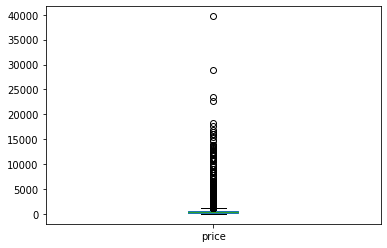

In [24]:
df.price.plot(kind='box')

**Grande quantidade de valores grandes**


In [25]:
## Check the median because the mean may be altered by the large price values 
no_null.price.median()

289.0

**Mediana = 289, isso mostra que a media dos preços tende a subir devido as compras de alto valor, o gasto de usuários comuns (gastos mais frequentes) são representados melhor pela mediana**  
**Por enquanto irei manter os valores altos por completo**

## 2.3 Data Cleaning - Duplicated | Limpeza de Dados - Duplicados 

In [26]:
no_null.duplicated(['sale_id'])

0        False
1        False
2        False
3        False
4        False
         ...  
25839    False
25840     True
25841    False
25842     True
25843     True
Length: 25844, dtype: bool

**Pode haver o mesmo 'sale_id' para diversos produtos, logo essas duplicadas não são problemáticas**

In [27]:
## Verificar dados duplicados
no_null.duplicated().sum()

0

**Sem linhas completas duplicadas**

# 3.0 - Análises

In [28]:
## Cria coluna de dia da semana da compra (0 segunda -> 6 domingo )
no_null['weekday'] =  no_null['date'].dt.dayofweek
df['weekday'] = df['date'].dt.dayofweek

## 3.1 - Faturamentos  
**Hipótes**      
**Os IDs dos clientes faltantes no DF completo são devidos à algum problema na coleta APENAS do ID do cliente, logo isso nao influência o faturamento**  
  
**Caso essa ausência de valor esteja ligada à algum tipo de problema que possa comprometer o restante dos dados, o melhor seria a utilização do dataframe sem os valores nulos**

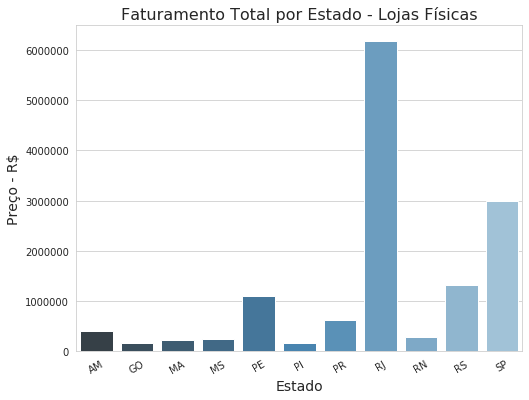

In [592]:
## Plotar Faturamento Total por Estado
plt.figure(figsize=(8,6))
ax = sns.barplot(x='state',y='price', data=df.groupby('state').sum().reset_index(), palette='Blues_d')
ax.set_xlabel('Estado', fontsize=14)
ax.set_ylabel('Preço - R$', fontsize=14)
ax.set_title('Faturamento Total por Estado - Lojas Físicas', fontsize=16)

for item in ax.get_xticklabels():
    item.set_rotation(30)
    
plt.savefig('./Images/Revenue-States-Offline.jpg')

In [428]:
## Faturamento Total (Usar o DataFrame completo, com os valores nulos)
print('Faturamento total no mes de agosto em 2018:',df.price.sum())
print('Faturamento total de usuários identificados: ', no_null.price.sum())

fat_total = df.price.sum()
fat_id = no_null.price.sum()

Faturamento total no mes de agosto em 2018: 13747940.13
Faturamento total de usuários identificados:  12202226.879999999


In [39]:
df.head()

,date,state,store_id,sale_id,off_product_id,quantity,price,customer_id,weekday
0,2018-08-01,RN,3162633,323932636465316,643839313230323,1,279.0,NaN,2
1,2018-08-01,RN,3162633,326463633336323,613665646663346,1,229.0,NaN,2
2,2018-08-01,RN,3162633,333331346330323,343739666265353,1,179.0,NaN,2
3,2018-08-01,RN,3162633,393461383633336,373034633762613,1,269.0,NaN,2
4,2018-08-01,RN,3162633,616531626536373,343634373062363,1,29.0,NaN,2


In [40]:
## Numero de Lojas
df.store_id.value_counts().count()

39

In [440]:
## Lojas com maior e menor faturamento
group = df.groupby('store_id').sum()
index_max = int(group[group.price==group.price.max()].reset_index()['store_id'].values)
index_min = int(group[group.price==group.price.min()].reset_index()['store_id'].values)

print('Loja com maior faturamento id:',index_max,'-',df[df.store_id==index_max].state.values[0])
print('Loja com menor faturamento id:',index_min,'-',df[df.store_id==index_min].state.values[0])

maior = str(index_max)+'-'+str(df[df.store_id==index_max].state.values[0])
menor = str(index_min)+'-'+str(df[df.store_id==index_min].state.values[0])

Loja com maior faturamento id: 6361373 - RJ
Loja com menor faturamento id: 3234666 - RJ


**Tanto a loja com maior quanto a com menor faturamento estão no RJ**

## 3.2 - Análise de Vendas sobre dias da semana

In [641]:
## Verificar vendas no fim de semana (selecionar por sale_id unico)
cariocas = df[df.state=='RJ']
# Numero de vendas na semana e fim de semana (Offline)
total = cariocas.drop_duplicates(subset=['sale_id']).sale_id.count()
fim = cariocas[(cariocas.weekday==6) | (cariocas.weekday==5)].drop_duplicates(subset=['sale_id']).sale_id.count()
normal =cariocas[(cariocas.weekday!=6) & (cariocas.weekday!=5)].drop_duplicates(subset=['sale_id']).sale_id.count()

In [642]:
print('Número total de vendas no final de semana:',fim)
print('Número total de vendas dias de semana:', normal)
print('Número total de compras:', total)

Número total de vendas no final de semana: 887
Número total de vendas dias de semana: 3514
Número total de compras: 4401


In [643]:
# Porcentagem da quantidade de compras dos cariocas no final de semana
pctg_vendas = (fim*100)/total
print('As compras dos cariocas no fim de semana representam:', pctg_vendas,'% das quantidade de compras total')

As compras dos cariocas no fim de semana representam: 20.15451033855942 % das quantidade de compras total


**Quantidade de compras representa gasto? Verificar**

In [644]:
df_grupo = df.groupby(['store_id', 'weekday','state']).sum().reset_index(['state','weekday'])

In [645]:
## Estados com maior faturamento
best_states = ['RJ','RS','SP','PE']
## Selecionar apenas os que estão na lista
df_dias = df_grupo[df_grupo.state.isin(best_states)]

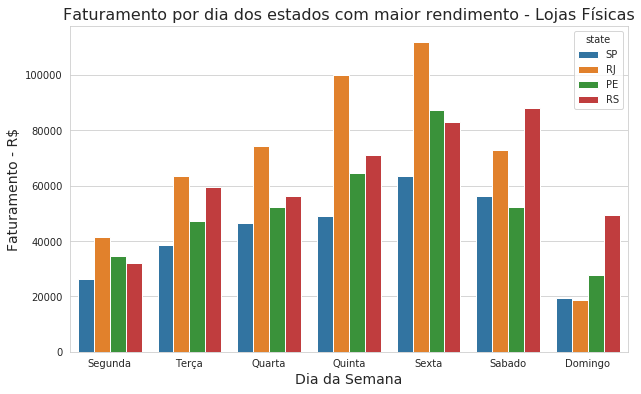

In [646]:
## Plot de faturamento por dia dos melhores estados
plt.figure(figsize=(10,6))
ax1 = sns.barplot(x='weekday',y='price', hue='state', data= df_dias, ci=0)
ax1.set_xlabel('Dia da Semana', fontsize=14)
ax1.set_ylabel('Faturamento - R$', fontsize=14)
ax1.set_xticklabels(['Segunda','Terça','Quarta','Quinta','Sexta','Sabado','Domingo'])
ax1.set_title('Faturamento por dia dos estados com maior rendimento - Lojas Físicas', fontsize=16)
plt.savefig('./Images/Revenue-Day-Bests-Offline.jpg')

In [647]:
store_week = cariocas.groupby(['store_id', 'weekday']).sum()

In [648]:
store_week.reset_index(inplace=True)

In [649]:
## Total Gasto no RJ em todos finais de Semana de agosto de 2018
spend_end = store_week[(store_week.weekday==5) | (store_week.weekday==6)].price.sum()
print('Total Gasto nos finais de Semana: R$', spend_end)

Total Gasto nos finais de Semana: R$ 1097666.58


In [650]:
## Total Gasto
spend_total = store_week.price.sum()
print('Gasto total: R$', spend_total)

Gasto total: R$ 6179551.72


In [651]:
pctg_spend = (spend_end*100)/spend_total
print('O valor das compras dos cariocas no fim de semana representam:', pctg_spend,'% do valor total das compras')

O valor das compras dos cariocas no fim de semana representam: 17.762883615771404 % do valor total das compras


# 4.0 - Exportando Resultados para CSV

## 4.1 Criar DataFrames de Saída

In [652]:
## Criar DataFrame
datas = {'faturamento_total(R$)':[fat_total], 'faturamento_id(R$)':[fat_id], 'loja_maior_faturamento': [maior],
        'loja_menor_faturamento':[menor],'total_vendas_fds': [fim], 
        'total_vendas_semana':[normal], 'total_vendas': [total],'perct_vendas_fds(%)': [round(pctg_vendas,2)], 
         'gastos_fds(R$)':[spend_end], 
        'gastos_total(R$)': [spend_total], 'perct_gastos_fds(%)':[round(pctg_spend,2)]}
df_offline = pd.DataFrame(data=datas)

In [653]:
## Tranposta DF para melhor legibilidade
pd.options.display.float_format = '{:20,.2f}'.format
transpose = df_offline.transpose()
transpose.columns = ['Valor']
transpose

,Valor
faturamento_total(R$),"13,747,940.13"
faturamento_id(R$),"12,202,226.88"
loja_maior_faturamento,6361373-RJ
loja_menor_faturamento,3234666-RJ
total_vendas_fds,887
total_vendas_semana,3514
total_vendas,4401
perct_vendas_fds(%),20.15
gastos_fds(R$),"1,097,666.58"
gastos_total(R$),"6,179,551.72"


### 4.2 Exportar DataFrames

In [654]:
## Exporta DataFrame de Saída em Colunas
df_offline.to_csv(r'./Outputs/Offline_Data/Off_Output_Horizontal.csv')
## Exporta DataFrame de Saída Transposto (em linhas)
transpose.to_csv(r'./Outputs/Offline_Data/Off_Output_Vertical.csv')